In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
import mlflow
import graphviz
import matplotlib.pyplot as plt

In [3]:
# Load the iris dataset
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Define the model hyperparameters
params = {"criterion": "gini", "min_samples_leaf": 5, "random_state": 42}

In [6]:
clf = tree.DecisionTreeClassifier(**params)
clf = clf.fit(X_train, y_train)

In [7]:
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)

In [8]:
metric_dict = {
    "f1_training": metrics.f1_score(y_train, y_predict_train, average="macro"),
    "accuracy_training": metrics.accuracy_score(y_train, y_predict_train),
    "f1_test": metrics.f1_score(y_test, y_predict_test, average="macro"),
    "accuracy_test": metrics.accuracy_score(y_test, y_predict_test),
    "precision_training": metrics.precision_score(y_train, y_predict_train, average="macro"),
    "precision_test": metrics.precision_score(y_test, y_predict_test, average="macro")
}

[Text(0.3333333333333333, 0.9, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.4444444444444444, 0.7, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.2222222222222222, 0.5, 'petal width (cm) <= 1.45\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.3, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = versicolor'),
 Text(0.6666666666666666, 0.5, 'petal width (cm) <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'),
 Text(0.5555555555555556, 0.3, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.7777777777777778, 0.3, 'petal length (cm) <= 4.95\ngini = 0.059\nsamples = 33\nvalue

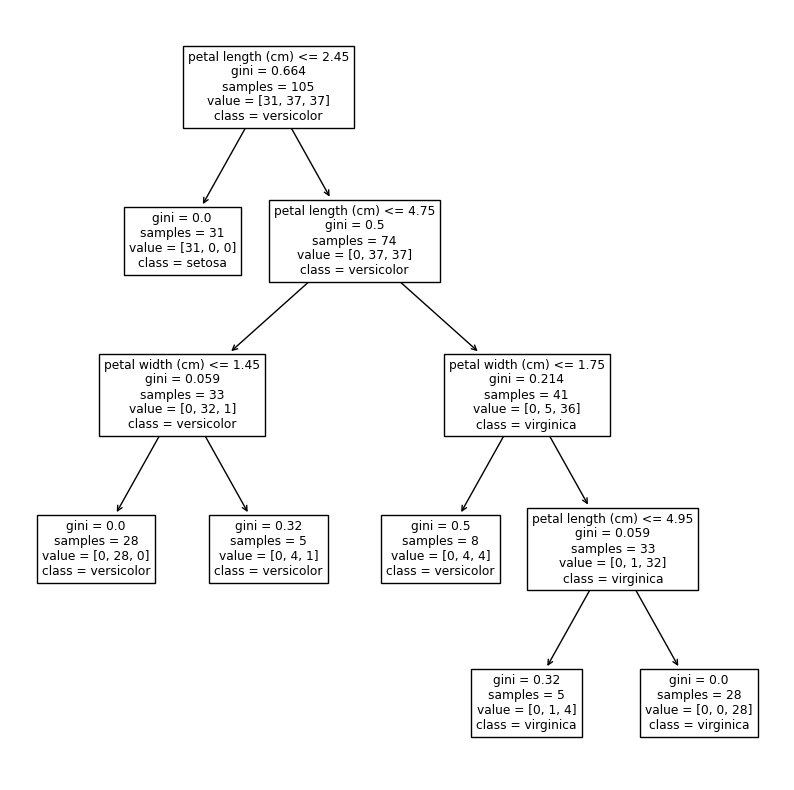

In [9]:
dt_fig, ax = plt.subplots(figsize=(10, 10))
tree_diagram = tree.plot_tree(clf, feature_names=X.columns, class_names=datasets.load_iris().target_names, ax=ax)
tree_diagram

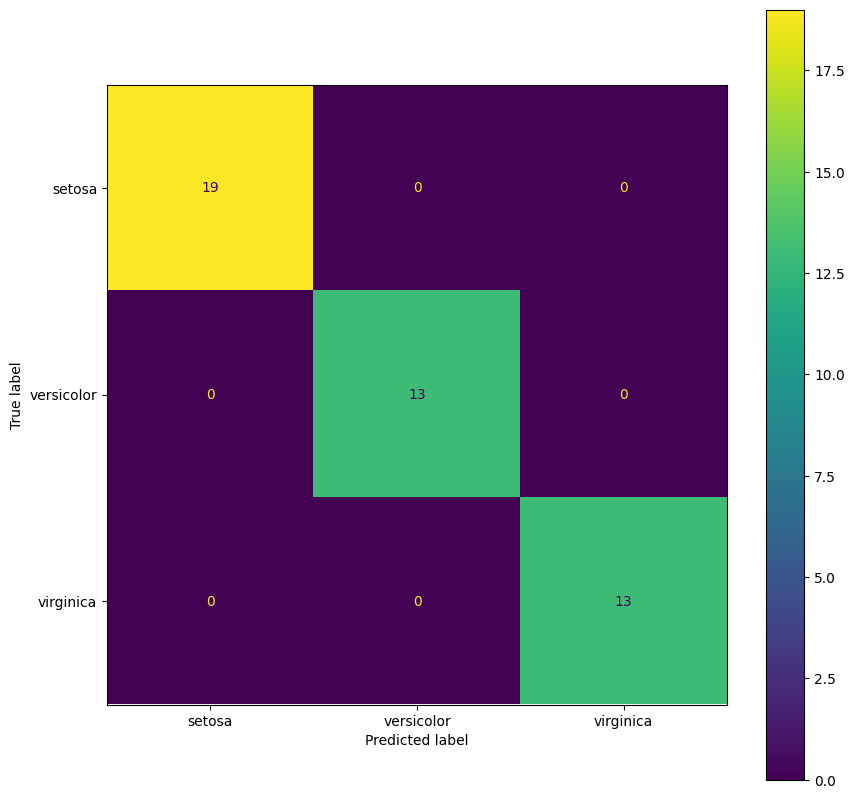

In [10]:
cm = metrics.confusion_matrix(y_test, y_predict_test, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=datasets.load_iris().target_names)
cm_fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

In [12]:
mlflow.set_experiment("IrisClassification")
mlflow.set_tracking_uri("sqlite:///mlruns.db")
with mlflow.start_run():
    mlflow.log_params(clf.get_params())
    mlflow.log_metrics(metric_dict)
    mlflow.set_tags(
        {
            "mlflow.source.name": "/Users/alanreese/Source/MLPractice/ClassificationTreePractice.ipynb",
            "mlflow.user": "alanreese",
            "model.class": clf._estimator_type,
            "model.type": clf,
        }
    )
    mlflow.sklearn.log_model(clf, "model")
    # Log metrics.classification_report as an artifact
    mlflow.log_dict(
        metrics.classification_report(
            y_test,
            y_predict_test,
            output_dict=True,
            target_names=datasets.load_iris().target_names,
        ),
        "classification_report.json",
    )
    # log the tree diagram as a figure
    mlflow.log_figure(dt_fig, "decision_tree.png")
    mlflow.log_figure(cm_fig, "confusion_matrix.png")